imports ...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


***
##  10 Thousand German News Dataset - Topic Classification

Wir laden das 10k German News Dataset. Es enthält ca. 10k Online News-Artikel einer österreichischen Tageszeitung.  
Die Artikel wurden von (menschlichen) Annotierern in verschiedene thematische Klassen eingeteilt.  
Jeder Artikel ist genau einer der folgenden neun Kategorien zugeordnet:  

+ 'Etat'
+ 'Inland'
+ 'International'
+ 'Kultur'
+ 'Panorama'
+ 'Sport'
+ 'Web'
+ 'Wirtschaft'
+ 'Wissenschaft'

Mehr Details zum Datenset unter: https://tblock.github.io/10kGNAD/
  
Zunächst laden wir das Datenset in einen Dataframe "gnd"

In [3]:
path = 'f:\\Data\\DataScienceUni\\40200\\BMW Bank Seminar\\Data Sets\\'

gnd = pd.read_csv(path+'10kGNAD_train.csv', header=None, sep=';', quotechar="'", names=['label', 'text'])
pd.set_option('display.max_colwidth', None)
print("Umfang des Datensets:",gnd.shape)
gnd.head(5)

Umfang des Datensets: (9245, 2)


label  \
0       Sport   
1      Kultur   
2         Web   
3  Wirtschaft   
4      Inland   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Kurze Exploration der Daten

Panorama         0.163
Web              0.163
International    0.147
Wirtschaft       0.137
Sport            0.117
Inland           0.099
Etat             0.065
Wissenschaft     0.056
Kultur           0.052
Name: label, dtype: float64


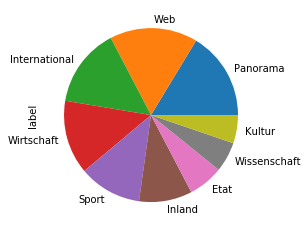

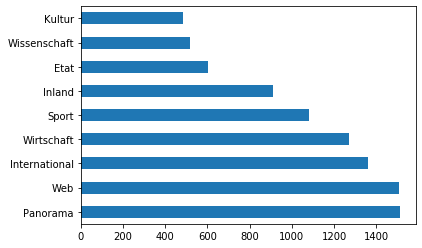

In [4]:
print(gnd.label.value_counts(normalize=True).round(3))
_= gnd.label.value_counts().plot(kind="pie", )
plt.show()
_= gnd.label.value_counts().plot(kind="barh", )

Wir splitten wieder in Training (70%) und Test-Set (30%):

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(gnd, test_size=.3, stratify=gnd.label)
df_train.shape, df_test.shape

((6471, 2), (2774, 2))

In [6]:
df_train.label.value_counts(normalize=True).round(3)

Panorama         0.163
Web              0.163
International    0.147
Wirtschaft       0.137
Sport            0.117
Inland           0.099
Etat             0.065
Wissenschaft     0.056
Kultur           0.052
Name: label, dtype: float64

Wir importieren die notwendigen Classifier & Tools aus Scikit-Learn

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

Dann bauen wir eine "Pipeline", in der automatisch das Preprocessing vorgenommen wird.  
Auch dafür stellt Scikit-Learn mit der Klasse "Pipeline" ein sehr nützliches Werkzeug bereit.  

In [8]:
# classifier pipeline mit Support Vektor Machine als Classifier definieren
lsvc_classifier = Pipeline([
  ('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer(sublinear_tf=True)),                   
  ('clf', LinearSVC(dual=False, C=1.6, class_weight="balanced")),
])

# classifier mit vorgeschalteter Pipeline trainieren:
lsvc_classifier.fit(df_train['text'], df_train['label'])  # train the classifier

# trainierten classifier auf die Testdaten anwenden, um den Accuracy Score zu ermitteln:
predicted = lsvc_classifier.predict(df_test['text'])  # predict the test set 
print(classification_report(predicted, df_test.label))

               precision    recall  f1-score   support

         Etat       0.79      0.91      0.85       158
       Inland       0.79      0.80      0.79       271
International       0.87      0.87      0.87       406
       Kultur       0.91      0.83      0.87       160
     Panorama       0.85      0.81      0.83       474
        Sport       0.97      0.98      0.97       323
          Web       0.88      0.91      0.89       437
   Wirtschaft       0.83      0.81      0.82       394
 Wissenschaft       0.85      0.87      0.86       151

     accuracy                           0.86      2774
    macro avg       0.86      0.87      0.86      2774
 weighted avg       0.86      0.86      0.86      2774



Zum Vergleich dasselbe nochmal mit einem anderen Classifier: "Logistische Regression"

In [9]:
logReg_classifier = Pipeline([
  ('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer(sublinear_tf=True)),               
  ('clf', LogisticRegression(class_weight="balanced", solver='lbfgs', multi_class='auto'),),
])

logReg_classifier.fit(df_train['text'], df_train['label'])         # train the classifier
predicted = logReg_classifier.predict(df_test['text'])             # predict the test set 
acc = np.mean(predicted == df_test['label'])                       # calculate the accuracy
print(classification_report(predicted, df_test.label))

               precision    recall  f1-score   support

         Etat       0.77      0.87      0.82       159
       Inland       0.80      0.72      0.76       302
International       0.85      0.86      0.86       403
       Kultur       0.91      0.73      0.81       182
     Panorama       0.79      0.81      0.80       443
        Sport       0.95      0.99      0.97       311
          Web       0.85      0.94      0.89       407
   Wirtschaft       0.82      0.76      0.79       410
 Wissenschaft       0.85      0.84      0.85       157

     accuracy                           0.84      2774
    macro avg       0.84      0.84      0.84      2774
 weighted avg       0.84      0.84      0.84      2774



# Parkplatz

In [ ]:
# os.chdir("F://Data/Data Science Uni/40200/BMW Bank Seminar/Data Sets")
# path = 'f:\\Data\\DataScienceUni\\40200\\BMW Bank Seminar\\Data Sets\\'